# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# units = "Metric"
# url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" #+ weather_api_key + "&q="
# url_query = f"{url}&q={city}"
# url

In [10]:
# Set the API base URL
units = "Metric"
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
time.sleep(1)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ingeniero jacobacci
Processing Record 2 of Set 1 | songyang
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | cooper's town
Processing Record 5 of Set 1 | sidney
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | ayancik
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | shangri-la
City not found. Skipping...
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | howard springs
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | taulaga
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...
Processing 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ingeniero jacobacci,-41.3427,-69.5448,5.45,72,100,1.55,AR,1717516562
1,songyang,34.4553,113.0281,20.09,63,100,1.35,CN,1717516563
2,bilibino,68.0546,166.4372,7.49,68,85,0.93,RU,1717516563
3,cooper's town,26.8667,-77.5167,25.87,81,25,5.67,BS,1717516563
4,sidney,-33.8679,151.2073,12.62,74,93,3.09,AU,1717516395


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ingeniero jacobacci,-41.3427,-69.5448,5.45,72,100,1.55,AR,1717516562
1,songyang,34.4553,113.0281,20.09,63,100,1.35,CN,1717516563
2,bilibino,68.0546,166.4372,7.49,68,85,0.93,RU,1717516563
3,cooper's town,26.8667,-77.5167,25.87,81,25,5.67,BS,1717516563
4,sidney,-33.8679,151.2073,12.62,74,93,3.09,AU,1717516395


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

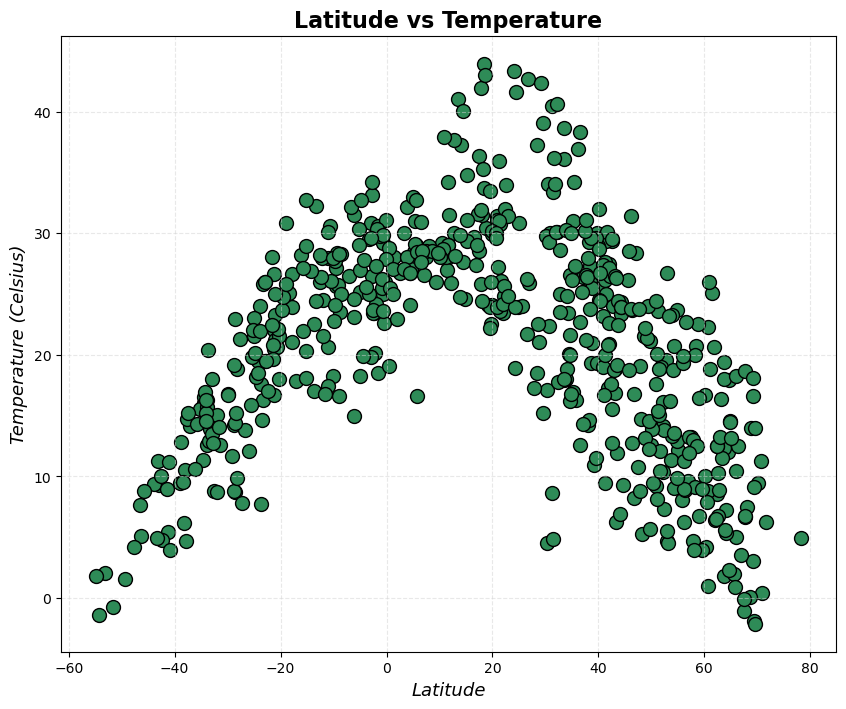

In [15]:
# Build scatter plot for latitude vs. temperature
x = city_data_df.Lat
y = city_data_df["Max Temp"]

plt.figure(figsize=(10,8))

plt.scatter(x, y, facecolor="seagreen", edgecolor="black", s=100)
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=13, fontstyle="italic")
plt.ylabel("Temperature (Celsius)", fontsize=13, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

In [16]:
# # Build scatter plot for latitude vs. temperature
# plt.scatter(
#     city_data_df["Lat"],
#     city_data_df["Max Temp"],
#     edgecolor = "black",
#     linewidth = 1,
#     marker = "o",
#     alpha = 0.9,
#     label = "cities")

# # Incorporate the other graph properties
# plt.title("City Max Latitude vs Temperature (%s)), time.strftime("%y-%m-%d"))
# plt.xlabel=("Latitude")
# plt.ylabel= ("Max Temperature")
# plt.grid(True)

# # Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()

#### Latitude Vs. Humidity

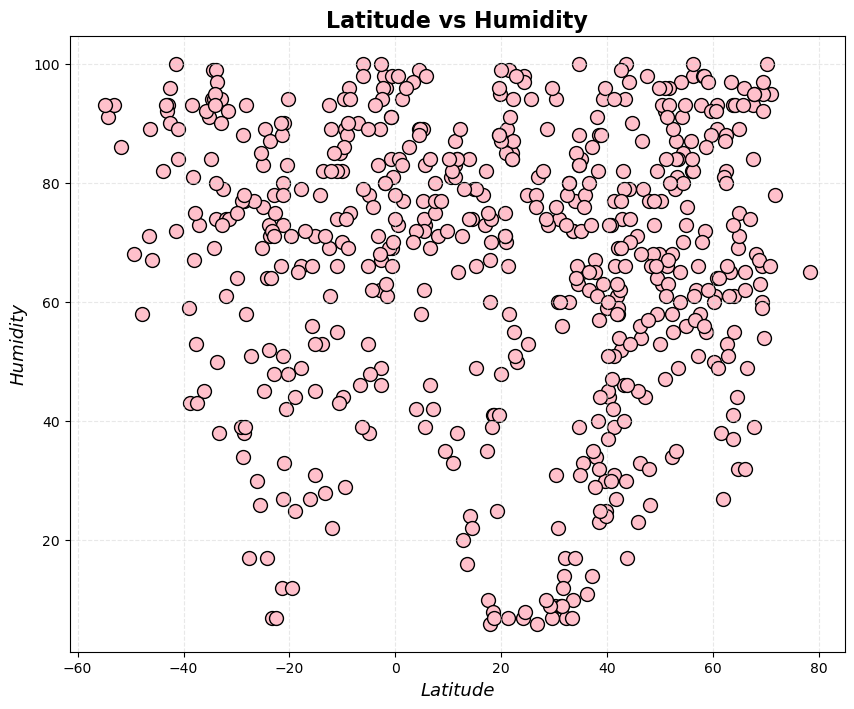

In [17]:
# Build scatter plot for latitude vs. temperature
x = city_data_df.Lat
y = city_data_df["Humidity"]

plt.figure(figsize=(10,8))

plt.scatter(x, y, facecolor="pink", edgecolor="black", s=100)
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=13, fontstyle="italic")
plt.ylabel("Humidity", fontsize=13, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

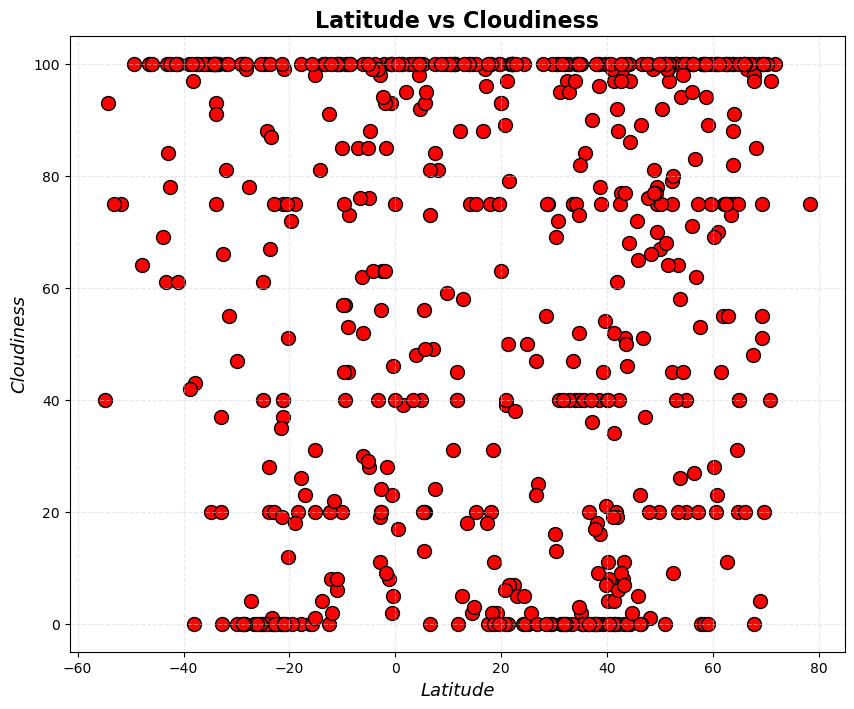

In [18]:
# Build scatter plot for latitude vs. temperature
x = city_data_df.Lat
y = city_data_df["Cloudiness"]

plt.figure(figsize=(10,8))

plt.scatter(x, y, facecolor="red", edgecolor="black", s=100)
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=13, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=13, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

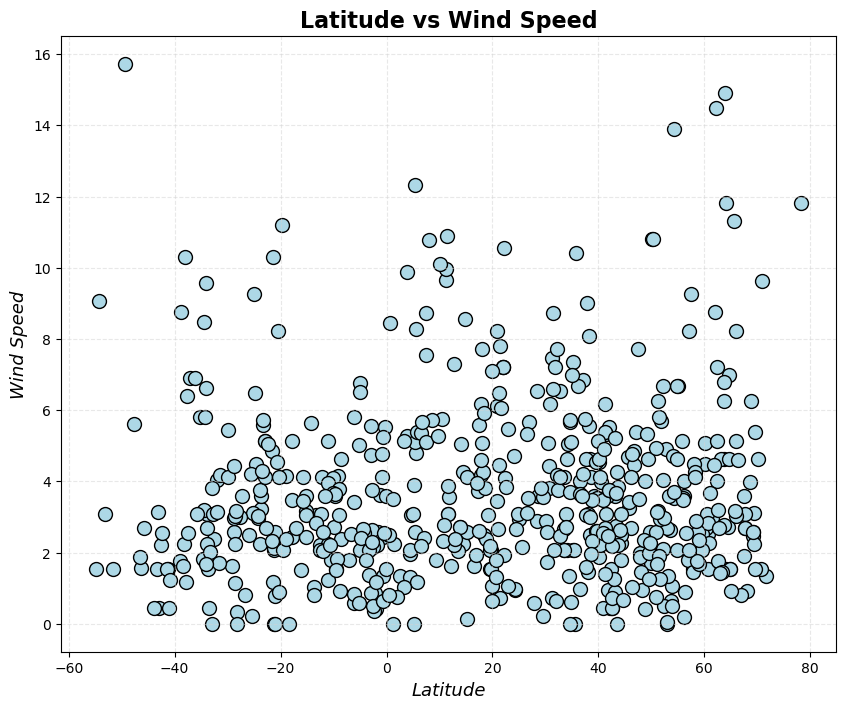

In [19]:
# Build scatter plot for latitude vs. temperature
x = city_data_df.Lat
y = city_data_df["Wind Speed"]

plt.figure(figsize=(10,8))

plt.scatter(x, y, facecolor="lightblue", edgecolor="black", s=100)
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=13, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=13, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def plot_linear_regress(x_values, y_values, x_label, y_label, equation):
    
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))
    
    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="darkorchid", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    # Step 4: Customizations
    plt.xlabel(x_label, fontsize=12, fontstyle="italic")
    plt.ylabel(y_label, fontsize=12, fontstyle="italic")
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq,equation,fontsize=15,color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

The r-squared is: 0.01531139963878905


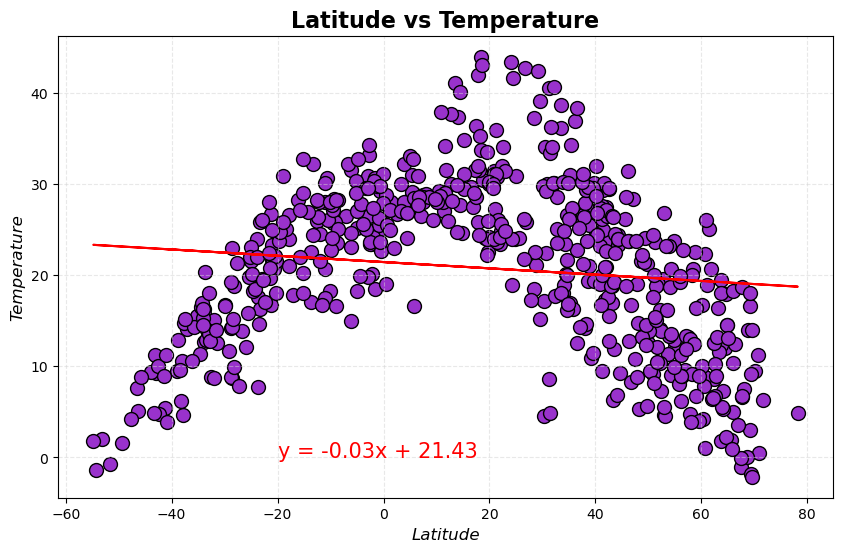

In [48]:
x = city_data_df.Lat
y = city_data_df["Max Temp"]
eq  = (-20,0)
plot_linear_regress(x, y, "Latitude", "Temperature",eq)

In [49]:
print(min(y))

-2.11


The r-squared is: 0.00354053679506699


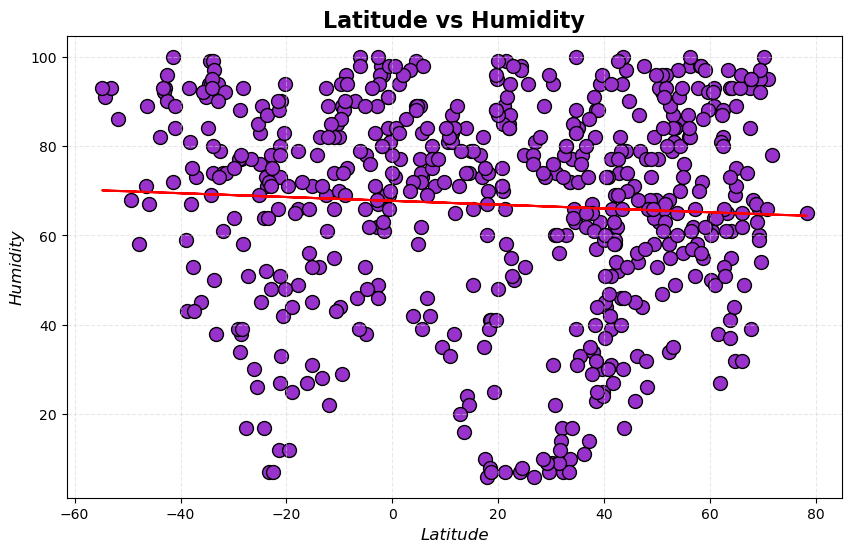

In [50]:
x = city_data_df.Lat
y = city_data_df["Humidity"]
eq  = (-20,0)
plot_linear_regress(x, y, "Latitude", "Humidity",eq)

In [51]:
# # Define a function to create Linear Regression plots
# def plot_linear_regress(x_values, y_values, x_title, y_title, text_coordinates):
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# # Plot
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values, regress_values)
#     plt.annotate(line_eq,text_coordinates,fontsize=19,color="darkpink")
#     plt.xlabel("Latitude")
#     plt.ylabel(title)
#     print(f"The r-value is: {rvalue**2}")
#     plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,songyang,34.4553,113.0281,20.09,63,100,1.35,CN,1717516563
2,bilibino,68.0546,166.4372,7.49,68,85,0.93,RU,1717516563
3,cooper's town,26.8667,-77.5167,25.87,81,25,5.67,BS,1717516563
7,iqaluit,63.7506,-68.5145,1.85,93,100,4.63,CA,1717516564
8,ayancik,41.9447,34.5861,20.93,69,88,5.52,TR,1717516564


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ingeniero jacobacci,-41.3427,-69.5448,5.45,72,100,1.55,AR,1717516562
4,sidney,-33.8679,151.2073,12.62,74,93,3.09,AU,1717516395
5,edinburgh of the seven seas,-37.0676,-12.3116,14.13,73,100,6.90,SH,1717516563
6,avarua,-21.2078,-159.7750,22.03,73,40,2.06,CK,1717516563
9,port-aux-francais,-49.3500,70.2167,1.56,68,100,15.73,TF,1717516564


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.496836358021299


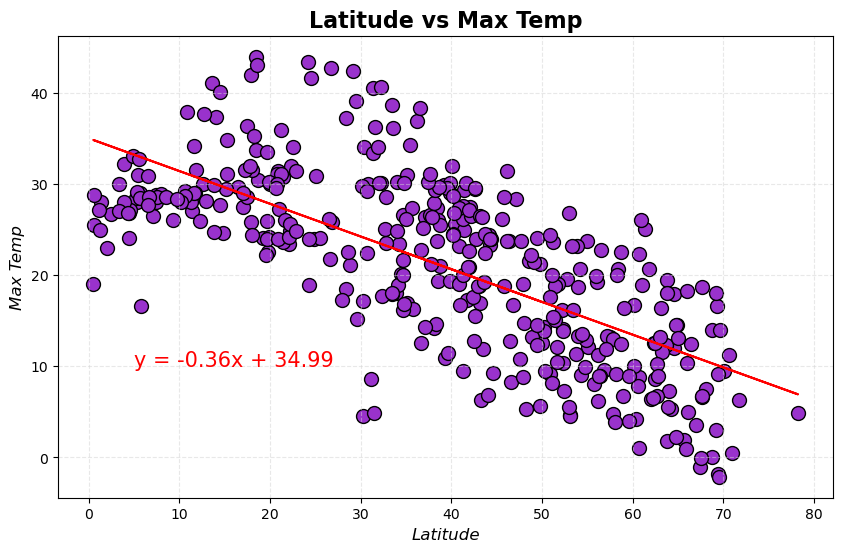

In [54]:
# Linear regression on Northern Hemisphere
x = north_hem_df.Lat
y = north_hem_df["Max Temp"]
eq  = (5,10)
plot_linear_regress(x, y, "Latitude", "Max Temp",eq)

The r-squared is: 0.7022278372518176


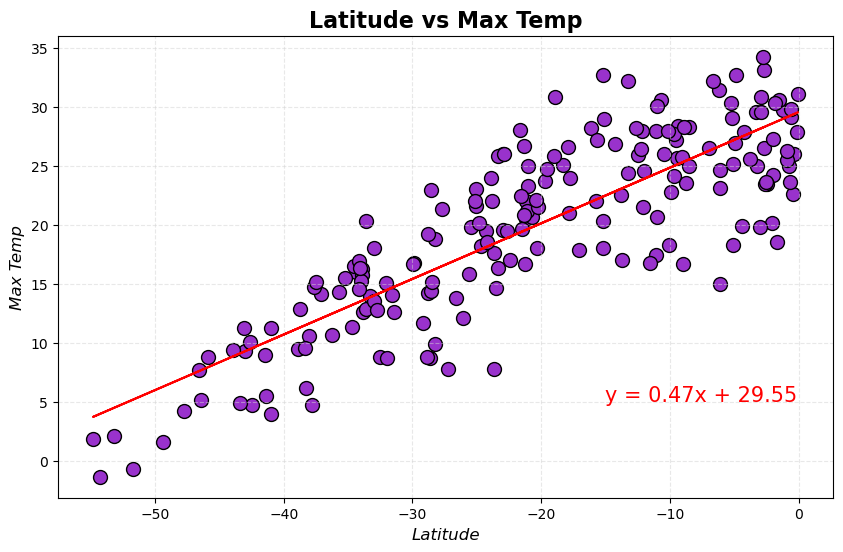

In [55]:
# Linear regression on Southern Hemisphere
x = south_hem_df.Lat
y = south_hem_df["Max Temp"]
eq  = (-15,5)
plot_linear_regress(x, y, "Latitude", "Max Temp",eq)

**Discussion about the linear relationship:** 
The linear regression for northern and southern hemisphere are inversely related with a strong relationship from the r value. This makes sense since the equator has warmer weather year round and the more northern and southern you get the temperatures get colder. Except there seem to be less of a relationship of temperature in the northern hemisphere. So the latitude is not as critical in determining what the max temperature is going to be. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.003302049519599057


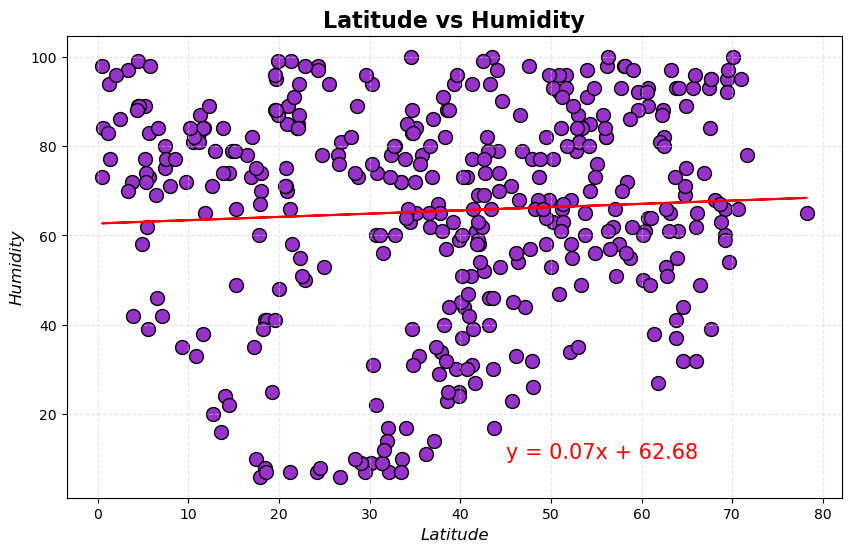

In [56]:
# Northern Hemisphere
x = north_hem_df.Lat
y = north_hem_df["Humidity"]
eq  = (45,10)
plot_linear_regress(x, y, "Latitude", "Humidity",eq)

The r-squared is: 0.003409762765455269


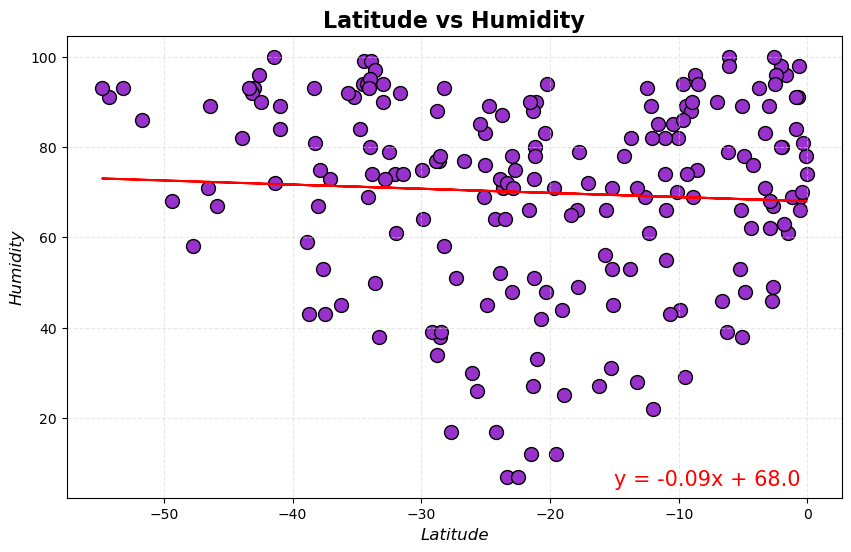

In [57]:
# Southern Hemisphere
x = south_hem_df.Lat
y = south_hem_df["Humidity"]
eq  = (-15,5)
plot_linear_regress(x, y, "Latitude", "Humidity",eq)

**Discussion about the linear relationship:** 
There really is no relationship between humidity and latitude. This makes sense to me because access to water is at least available along the coasts which is everywhere in the world, even in the northern and southern poles.

In [ ]:
### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.010809676748762239


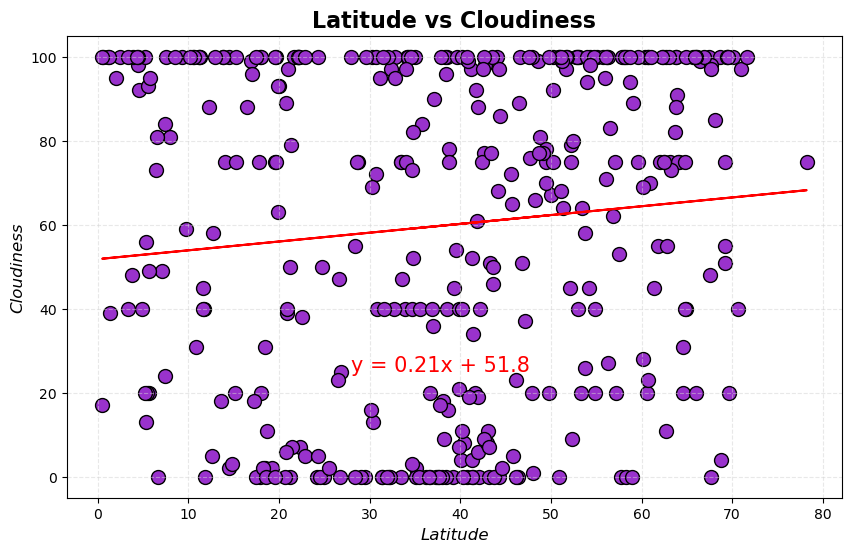

In [62]:
# Northern Hemisphere
x = north_hem_df.Lat
y = north_hem_df["Cloudiness"]
eq  = (28,25)
plot_linear_regress(x, y, "Latitude", "Cloudiness",eq)

The r-squared is: 0.029087703708571926


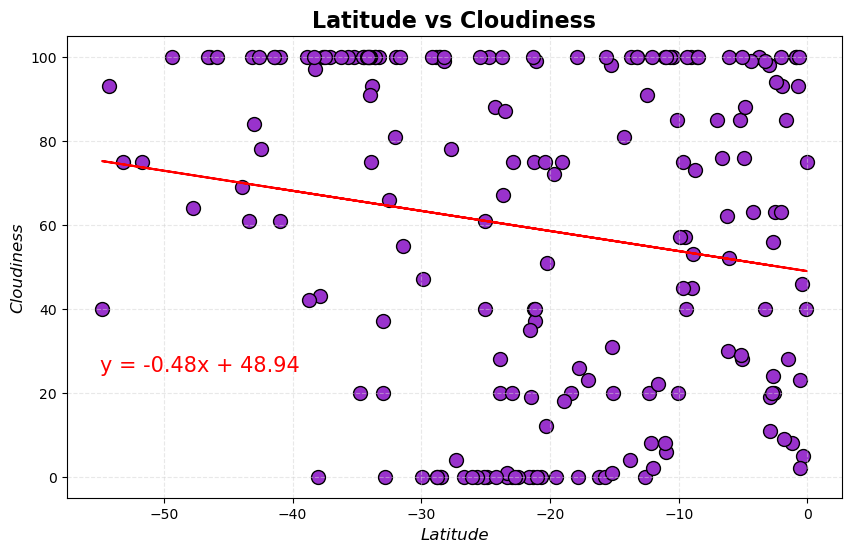

In [63]:
# Southern Hemisphere
x = south_hem_df.Lat
y = south_hem_df["Cloudiness"]
eq  = (-55,25)
plot_linear_regress(x, y, "Latitude", "Cloudiness",eq)

**Discussion about the linear relationship:** 
There is also not a huge relationship with cloudiness when it comes to latitude. This is probably for the same reason as with humidity not having a relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002022934392637729


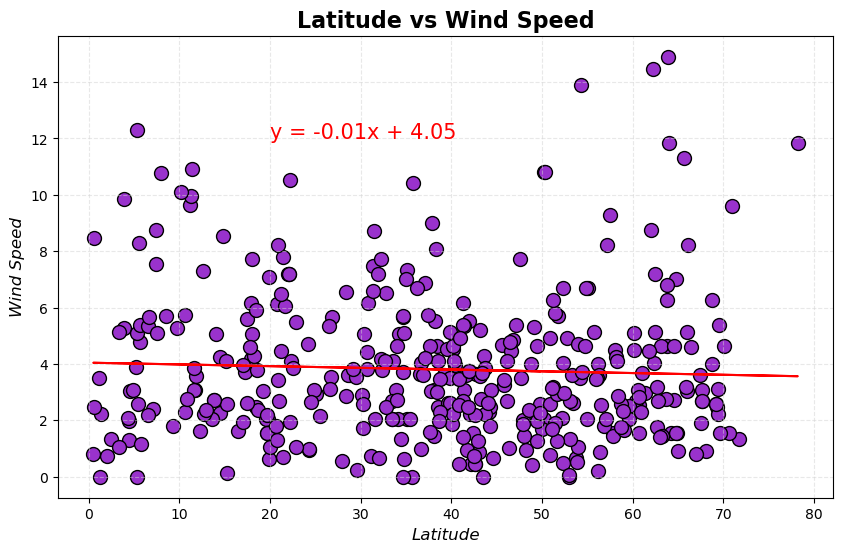

In [65]:
# Northern Hemisphere
x = north_hem_df.Lat
y = north_hem_df["Wind Speed"]
eq  = (20,12)
plot_linear_regress(x, y, "Latitude", "Wind Speed",eq)

The r-squared is: 0.02311513179057597


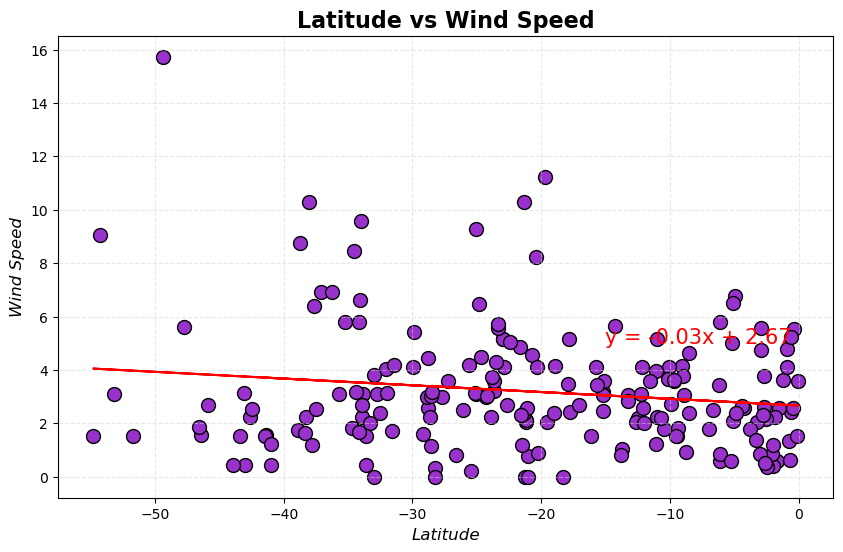

In [66]:
# Southern Hemisphere
x = south_hem_df.Lat
y = south_hem_df["Wind Speed"]
eq  = (-15,5)
plot_linear_regress(x, y, "Latitude", "Wind Speed",eq)

**Discussion about the linear relationship:** 
Wind speed has almost no relationship to latitude. I don't know enough to guess why though.